# CHICAGO CRIME ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv("Crimes_2001_to_Present_2024.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


The original dataset contains 8.15M rows and 22 columns

#### For ease of use, we are taking only 100k rows for our analysis.

In [3]:
chunk_size = 100000 # This defines the number of rows per chunk that will be read from the CSV file.
chunks = pd.read_csv("Crimes_2001_to_Present_2024.csv", chunksize=chunk_size, low_memory=False)

# Initializing an empty list to store DataFrames
chunk_list = []

# Iterating through the chunks and storing them in the list
for i, chunk in enumerate(chunks):
    chunk_list.append(chunk)
    if i == 0:
        break  # Break after the first chunk

# Concatenating the list of DataFrames into a single DataFrame
data = pd.concat(chunk_list, ignore_index=True)

# Displaying the first few rows of the concatenated DataFrame
print(data.head())

         ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   

   IUCR Primary Type                                        Description  \
0  0560      ASSAULT                                             SIMPLE   
1  0110     HOMICIDE                                FIRST DEGREE MURDER   
2  0110     HOMICIDE                                FIRST DEGREE MURDER   
3  0620     BURGLARY                                     UNLAWFUL ENTRY   
4  0454      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \

In [4]:
# converting the data into acsv file
output_file = "Chicago_Crimes_Filtered_Data.csv"
data.to_csv(output_file, index=False)

In [5]:
# checking the first few rows of our dataframe
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [6]:
print(f'Now the data contains {data.shape[0]} rows and {data.shape[1]} columns')

Now the data contains 100000 rows and 22 columns


## Exploratory Data Analysis (EDA)

In [7]:
# checking the datatypes of our columns
data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
# summary statistics of the dataset
data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+05,100000.000000,100000.00000,99925.000000,99930.000000,9.862900e+04,9.862900e+04,100000.000000,98629.000000,98629.000000
mean,1.319894e+07,1164.549930,11.41428,23.218834,36.064015,1.165172e+06,1.887933e+06,2022.938260,41.848072,-87.669339
std,9.085723e+05,711.960995,7.11480,13.973282,21.676623,1.670777e+04,3.234086e+04,1.376128,0.088957,0.060674
min,1.150000e+03,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,1.323150e+07,611.000000,6.00000,10.000000,22.000000,1.154026e+06,1.860322e+06,2023.000000,41.772205,-87.709878
50%,1.326766e+07,1111.000000,11.00000,23.000000,32.000000,1.166935e+06,1.894313e+06,2023.000000,41.865747,-87.662924
75%,1.330450e+07,1733.000000,17.00000,34.000000,53.000000,1.176631e+06,1.910907e+06,2023.000000,41.911196,-87.627440
max,1.359242e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951503e+06,2024.000000,42.022549,-87.524532


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  99259 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   Domestic              100000 non-null  bool   
 10  Beat                  100000 non-null  int64  
 11  District              100000 non-null  int64  
 12  Ward                  99925 non-null   float64
 13  Community Area        99930 non-null   float64
 14  FBI Code              100000 non-null  object 
 15  X

In [10]:
# checking the number of null values in each column
data.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     741
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      75
Community Area            70
FBI Code                   0
X Coordinate            1371
Y Coordinate            1371
Year                       0
Updated On                 0
Latitude                1371
Longitude               1371
Location                1371
dtype: int64

1. We can see that most of the null values are in Location relation columns like X-Coordinate, Y-Coordinate, Latitude and Longitude.
2. Other that the location related columns, we have some null values in the 'Ward' and the 'Community Area' column to deal with.

#### Filling the null values of the 'Ward' column with 0

In [11]:
# Extracting unique values from the "Ward" column using set comprehension
unique_ward_values = {ward for ward in data["Ward"].unique()}

# Printing the unique values
print("Unique values in the 'Ward' column:", unique_ward_values)

Unique values in the 'Ward' column: {nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0}


In [12]:
# filling the null values with 0 using fillna() method
data['Ward'].fillna(0, inplace=True)
data['Ward'].isnull().sum()

0

In [13]:
# converting the ward column into int datatype
data['Ward'] = pd.to_numeric(data['Ward'], errors='coerce').fillna(0).astype(int)
data['Ward'].dtype

dtype('int64')

#### Filling the null values of the 'Community Area' column with 0

In [14]:
# Extracting unique values from the "Ward" column using set comprehension
unique_community_area_values = {Area for Area in data["Community Area"].unique()}

# Printing the unique values
print("Unique values in the 'Community Area' column:", unique_community_area_values)

Unique values in the 'Community Area' column: {nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0}


In [15]:
data['Community Area'].fillna(0, inplace=True)
data['Ward'].isnull().sum()

0

In [16]:
# converting the Community Area column into int datatype
data['Community Area'] = pd.to_numeric(data['Community Area'], errors='coerce').fillna(0).astype(int)
data['Community Area'].dtype

dtype('int64')

#### Similarly we are filling the other column values with 0 

In [17]:
x = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location Description', 'Location']
for i in x:
    data[i].fillna(0, inplace=True)

In [18]:
# checking the number of null values in each column
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Data Visualisations

#### Univariate Analysis

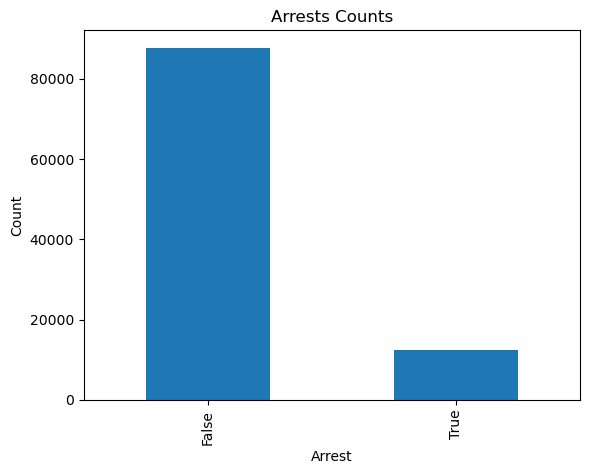

In [19]:
data['Arrest'].value_counts().plot(kind='bar')
plt.title('Arrests Counts')
plt.xlabel('Arrest')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis

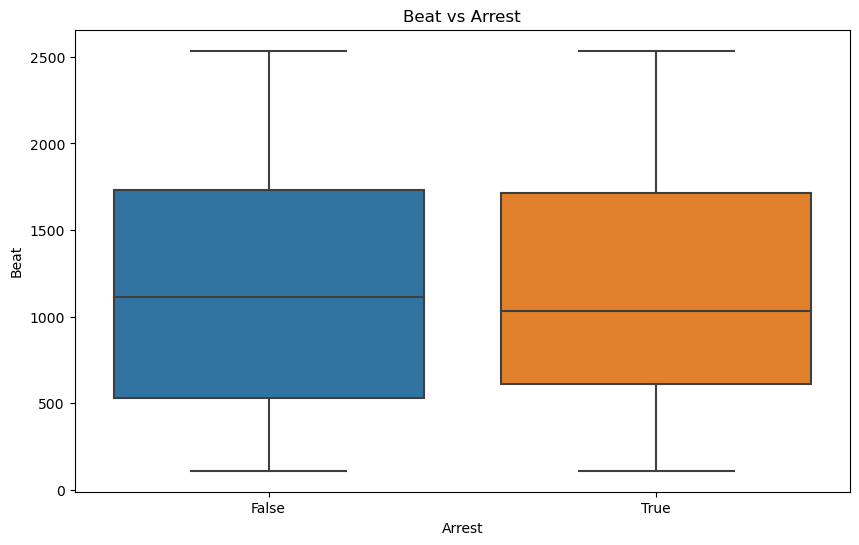

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Arrest', y='Beat', data=data)
plt.title('Beat vs Arrest')
plt.xlabel('Arrest')
plt.ylabel('Beat')
plt.show()

#### correlation matrix

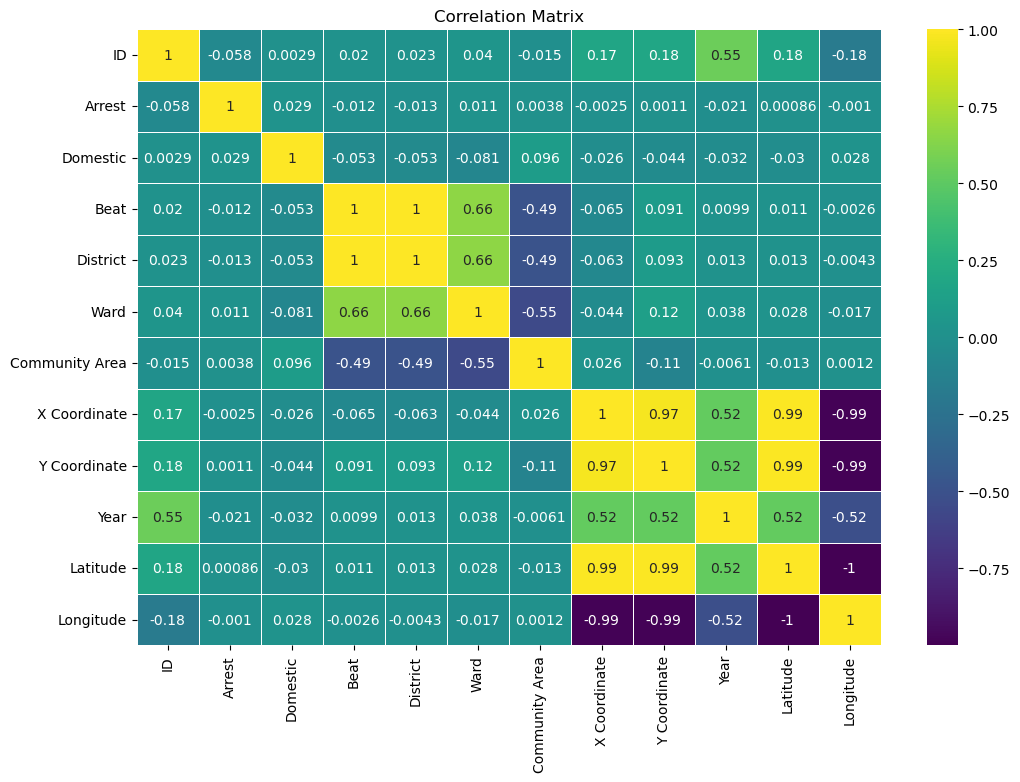

In [22]:
# Using a heatmap in order to find the correaltion between the variables of this dataset
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### plotting the distribution by Crime Types

Text(0.5, 1.0, 'Distribution of Crime Types')

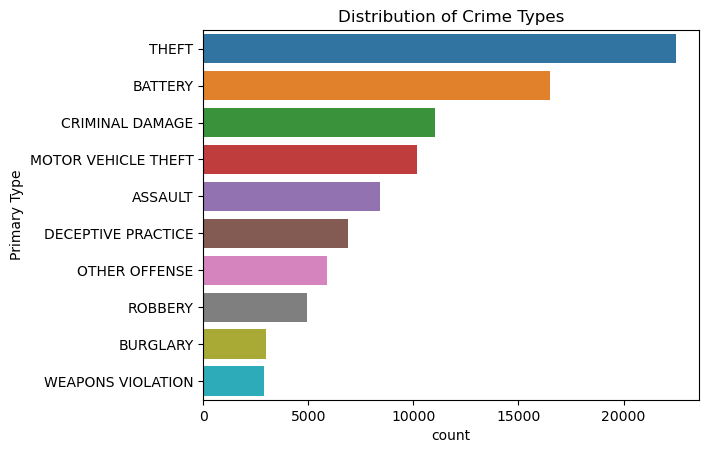

In [23]:
# Visualize the frequency of different types of crimes.
sns.countplot(y='Primary Type', data=data, order=data['Primary Type'].value_counts().head(10).index)
plt.title('Distribution of Crime Types')

In [24]:
# Getting the top 10 crime types
top_10_crimes = data['Primary Type'].value_counts().nlargest(10)

# Printing the top 10 crime types
print(top_10_crimes)

THEFT                  22470
BATTERY                16482
CRIMINAL DAMAGE        11034
MOTOR VEHICLE THEFT    10174
ASSAULT                 8412
DECEPTIVE PRACTICE      6892
OTHER OFFENSE           5891
ROBBERY                 4941
BURGLARY                2992
WEAPONS VIOLATION       2883
Name: Primary Type, dtype: int64


As we can observe that the most number of crimes involved are Thefts, followed by Battery and Criminal Damage respectively

#### Plotting number of Crimes in the Locations

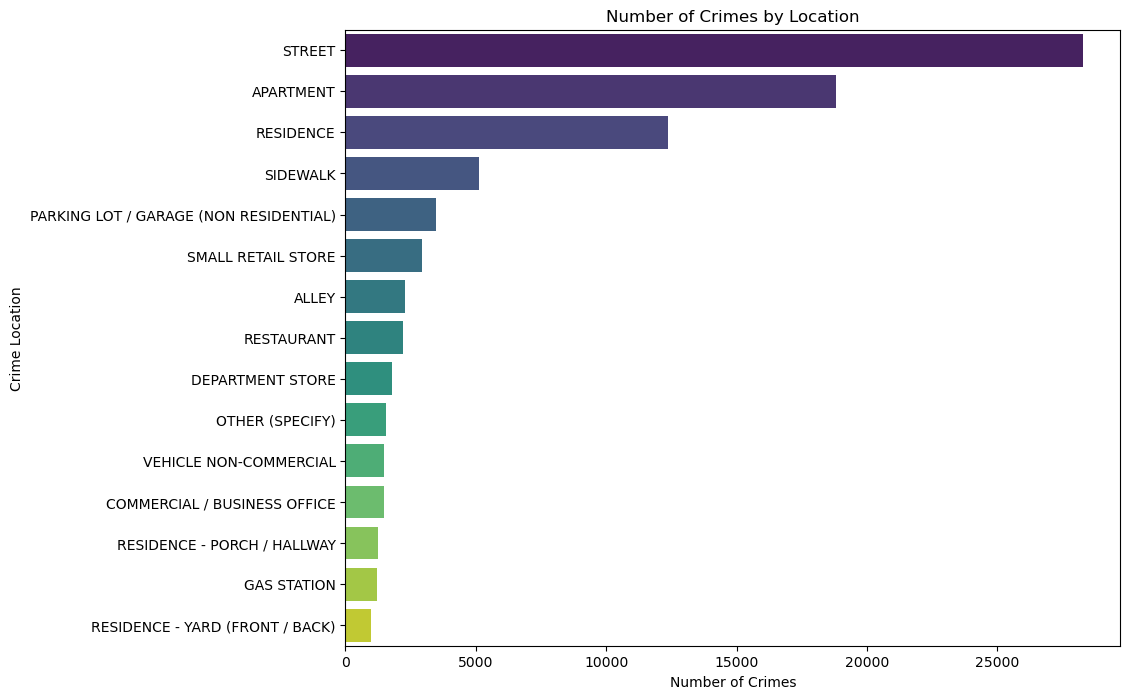

In [25]:
# Grouping the data by location description and counting the number of crimes
crime_count_by_location = data['Location Description'].value_counts().head(15)

# Plotting the count of crimes by location using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=crime_count_by_location.values, y=crime_count_by_location.index, palette='viridis')
plt.title('Number of Crimes by Location')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Location')
plt.show()


In [26]:
# Getting the top 15 crime locations
top_15_crime_locations = data['Location Description'].value_counts().nlargest(15)

# Printing the top 10 crime types
print(top_15_crime_locations)

STREET                                    28297
APARTMENT                                 18800
RESIDENCE                                 12349
SIDEWALK                                   5107
PARKING LOT / GARAGE (NON RESIDENTIAL)     3484
SMALL RETAIL STORE                         2933
ALLEY                                      2285
RESTAURANT                                 2223
DEPARTMENT STORE                           1779
OTHER (SPECIFY)                            1563
VEHICLE NON-COMMERCIAL                     1491
COMMERCIAL / BUSINESS OFFICE               1470
RESIDENCE - PORCH / HALLWAY                1263
GAS STATION                                1194
RESIDENCE - YARD (FRONT / BACK)             992
Name: Location Description, dtype: int64


We can see that most number of crimes happend in the street, followed by apartment and in the residences respectively.

####  Creating a catplot with different variable names

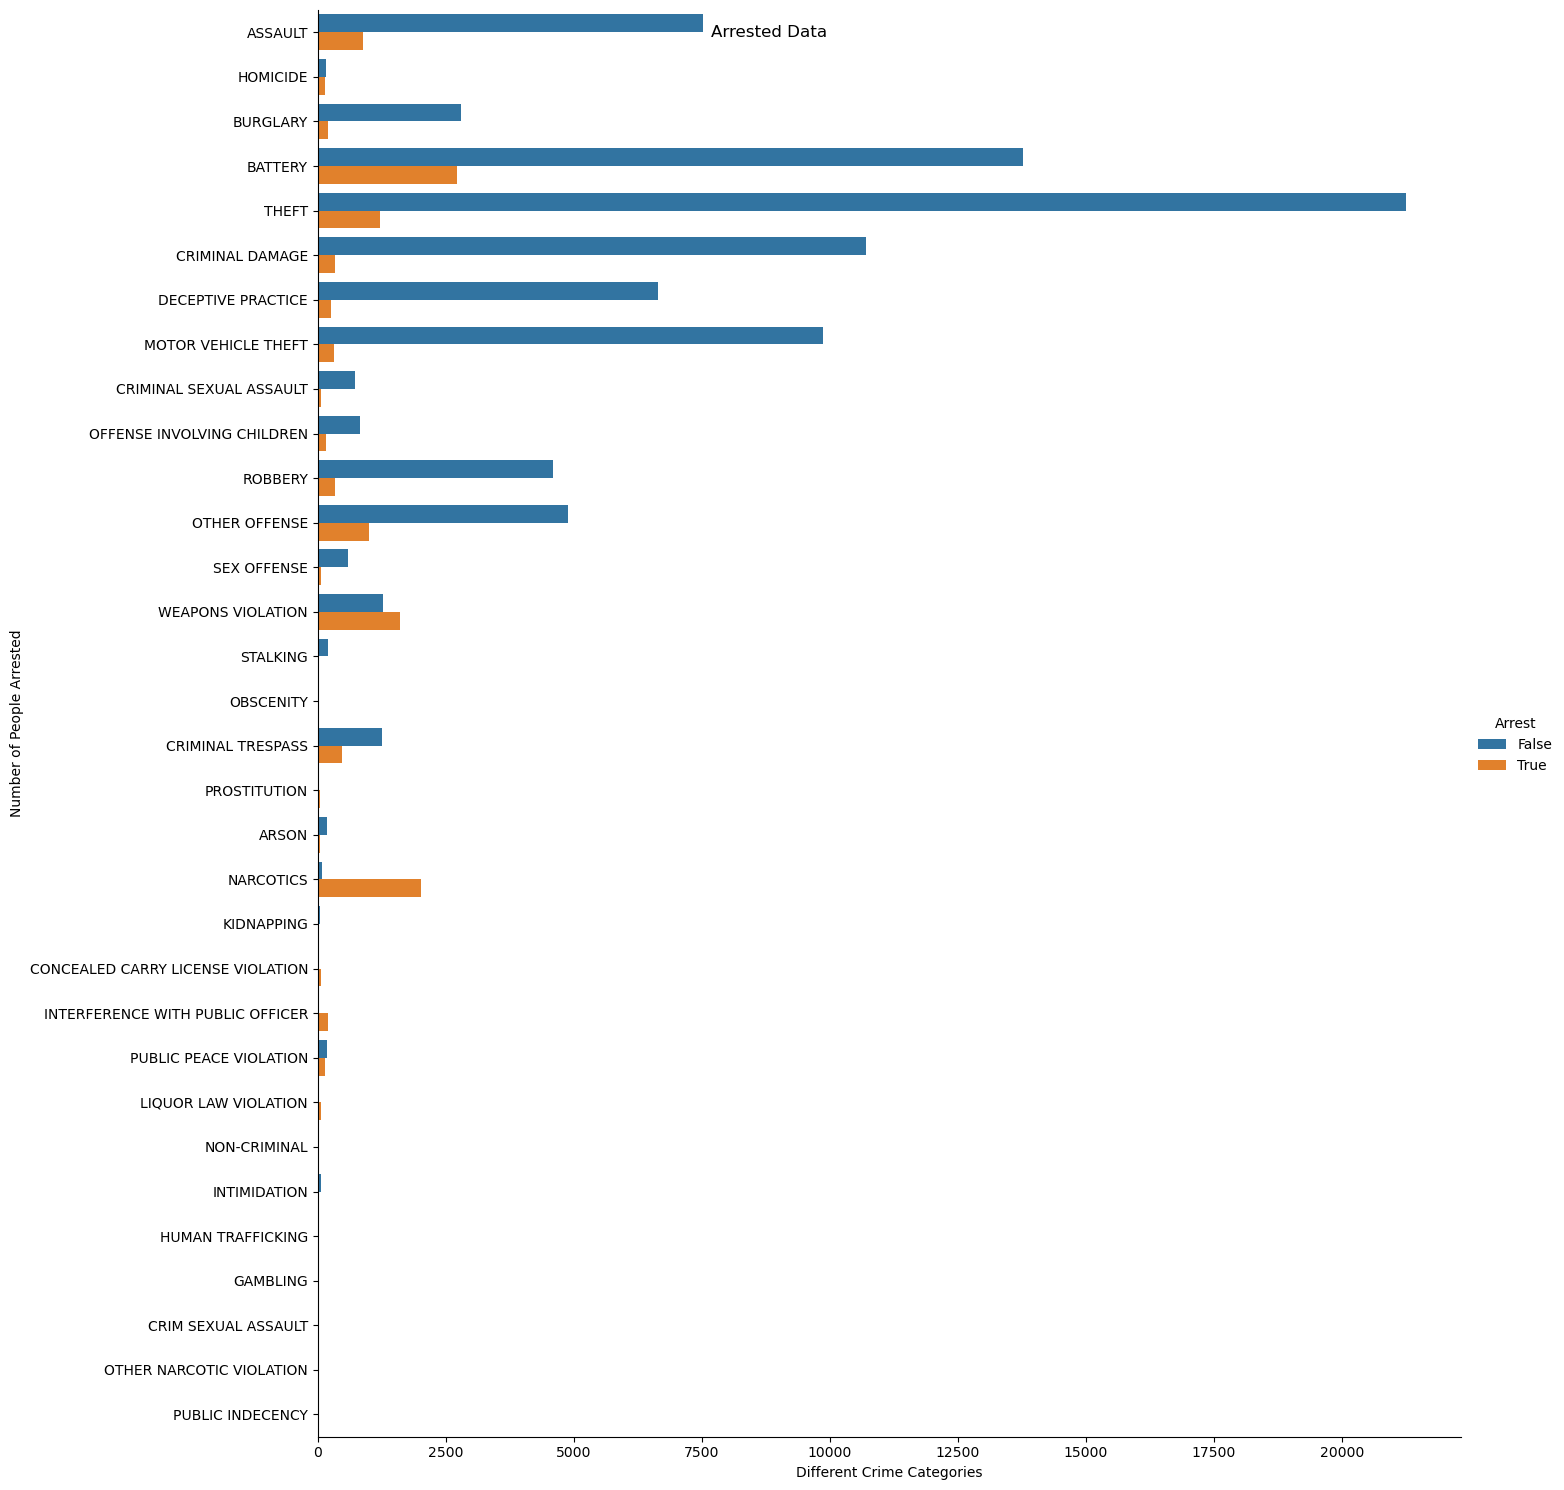

In [27]:
arrested_data = sns.catplot(y="Primary Type", hue="Arrest", kind="count", data=data, height=15)

# Setting axis labels
arrested_data.set_axis_labels("Different Crime Categories", "Number of People Arrested")

# Displaying the catplot
arrested_data.fig.suptitle("Arrested Data")
plt.show()

#### Plotting crime counts per police district with modified variable names

This plot provides an easy way to:

Compare crime counts across different police districts. Identify districts with higher-than-average crime rates (bars above the line). Identify districts with lower-than-average crime rates (bars below the line).


#### Plotting the pie chats for visualizing the percentage of arrests made

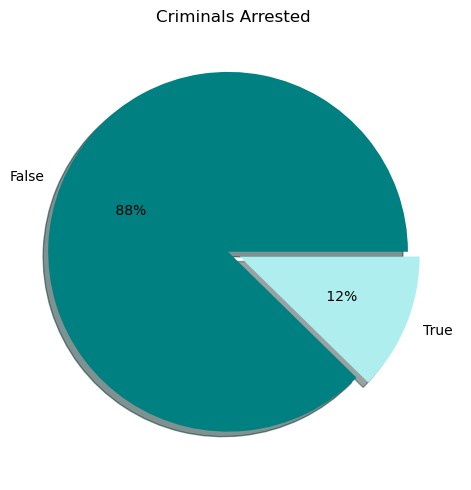

In [28]:
arrest_counts = data['Arrest'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct="%3.0f%%", colors=['teal', 'paleturquoise'], shadow=True, explode=[0.05, 0.02], textprops={'fontsize': 10})
plt.title('Criminals Arrested ', fontsize=12)
plt.tight_layout()
plt.show()

We can see that only 12 criminals were getting arrested out of every 100 crimes committed. 

#### Distribution of Community Area

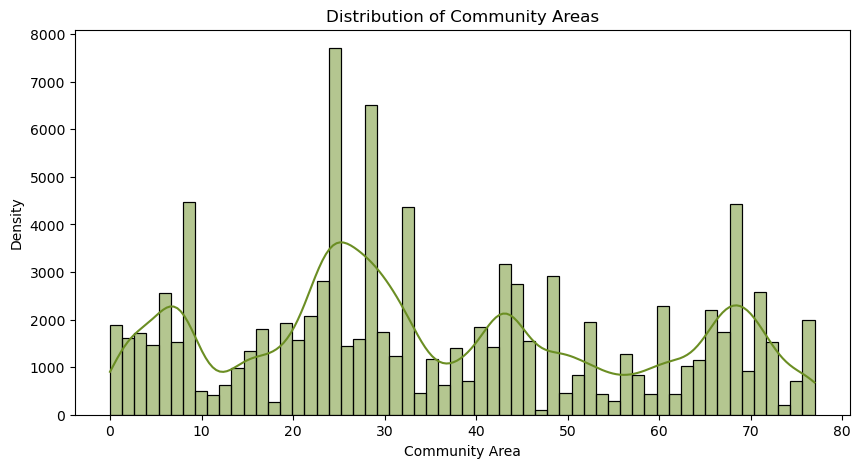

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Community Area", color='olivedrab', kde=True)
plt.title("Distribution of Community Areas")
plt.xlabel("Community Area")
plt.ylabel("Density")
plt.show()

This plot helps you visualize how crimes are distributed across various community areas in Chicago. By using both the histogram and KDE, you can observe both the frequency of crimes in specific areas (via the bars) and the overall distribution pattern (via the KDE curve).

#### Crime per Police Dsitrict

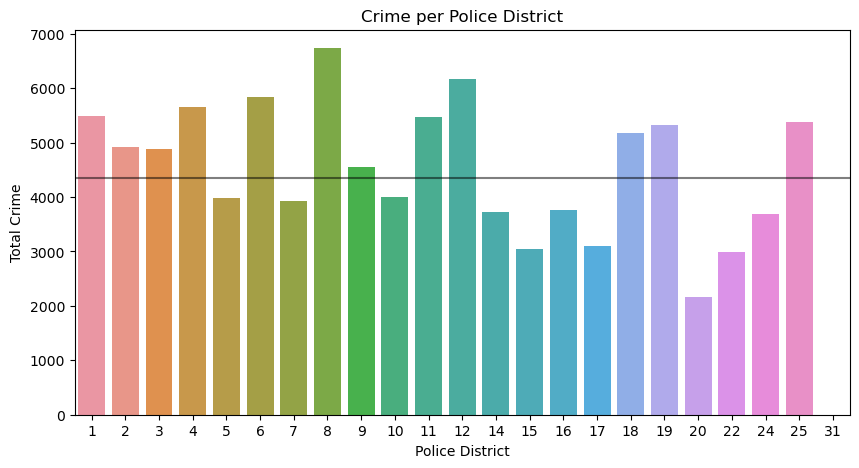

In [30]:
plt.figure(figsize=(10, 5))
crime_count_per_district = data['District'].value_counts()
sns.barplot(x=crime_count_per_district.index, y=crime_count_per_district.values)
mean_crime_count = crime_count_per_district.mean()
plt.axhline(mean_crime_count, color='black', alpha=0.5)
plt.xlabel('Police District')
plt.ylabel('Total Crime')
plt.title('Crime per Police District')

plt.show()

### Model Building

In [31]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49,1,08A,0.0,0.0,2007,08/17/2015 03:03:40 PM,0.000000,0.000000,0
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36,19,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50,13,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47,5,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6,44,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [32]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [33]:
chicago_crime = data.drop(['ID', 'Date', 'Block', 'Description', 
                           'X Coordinate', 'Y Coordinate', 
                           'Year', 'Updated On', 'Latitude', 'Longitude', 'Location',
                           'Location Description'],
                                       axis=1)

In [34]:
chicago_crime.columns

Index(['Case Number', 'IUCR', 'Primary Type', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code'],
      dtype='object')

In [35]:
chicago_crime.dtypes

Case Number       object
IUCR              object
Primary Type      object
Arrest              bool
Domestic            bool
Beat               int64
District           int64
Ward               int64
Community Area     int64
FBI Code          object
dtype: object

In [36]:
chicago_crime.head()

,Case Number,IUCR,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code
0,HN549294,0560,ASSAULT,False,False,2422,24,49,1,08A
1,JE240540,0110,HOMICIDE,True,False,2515,25,36,19,01A
2,JE279849,0110,HOMICIDE,True,False,1711,17,50,13,01A
3,JG507211,0620,BURGLARY,False,False,1922,19,47,5,05
4,JG501049,0454,BATTERY,True,False,632,6,6,44,08B


#### Importing all the required libraries

In [37]:
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.model_selection import train_test_split

# Define features excluding the target variable 'Arrest'
features = [col for col in chicago_crime.columns if col != 'Arrest']

# Assigning features and target variable to X and y respectively
X = chicago_crime.loc[:, features]
y = chicago_crime['Arrest']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Printing the number of records in training and test data, and the features
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')


Records in training data: 80,000
Records in test data: 20,000

Features:
Case Number
IUCR
Primary Type
Domestic
Beat
District
Ward
Community Area
FBI Code


In [39]:
# Selecting categorical columns
cat_columns = X.select_dtypes(include='object').columns.tolist()

# Displaying the list of categorical columns
print(cat_columns)

['Case Number', 'IUCR', 'Primary Type', 'FBI Code']


In [40]:
# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='most_frequent')),
    ('create_dummies', OneHotEncoder(handle_unknown='ignore'))
])

# Fit and transform the categorical features
cat_features_transformed = cat_pipeline.fit_transform(X_train[cat_columns])

# Displaying the shape of transformed categorical features
print(cat_features_transformed.shape)

(80000, 80340)


In [41]:
from sklearn.pipeline import Pipeline

# Define the processing pipeline
processing_pipeline = Pipeline([
    ('create_dummies', cat_pipeline)
])

# Fit and transform the processing pipeline
processed_pipeline = processing_pipeline.fit_transform(X_train[cat_columns])

# Displaying the shape of transformed data
print(processed_pipeline.shape)

(80000, 80340)


#### Model 1 iter 1

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression pipeline with the LogisticRegression model directly
logistic_regression_pipeline = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('model', LogisticRegression(max_iter=1000))
])

# Define parameters for grid search
params = {
    'model__C': [0.1, 0.3, 0.5, 1.0, 5],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV object
logistic_regression_model = GridSearchCV(logistic_regression_pipeline, param_grid=params, cv=5, scoring='accuracy')

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Display the best parameters
print(logistic_regression_model.best_params_)

{'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [43]:
# Predicting on the test and train data using the best estimator from the logistic regression model
predicted_y_test = logistic_regression_model.predict(X_test)
predicted_y_train = logistic_regression_model.predict(X_train)

# Printing the predictions
print(predicted_y_test)
print(predicted_y_train)

[False False False ... False False False]
[False False False ... False False False]


In [44]:
# Predicting on the train data
predicted_y_train = logistic_regression_model.predict(X_train)

# Calculating the train score
train_score = accuracy_score(y_train, predicted_y_train)

# Printing the train score
print(f'Train Score: {train_score:.2%}')

Train Score: 92.40%


In [45]:
# Predicting on the test data
predicted_y_test = logistic_regression_model.predict(X_test)

# Calculating the test score
test_score = accuracy_score(y_test, predicted_y_test)

# Printing the test score
print(f'Test Score: {test_score:.2%}')

Test Score: 92.20%


In [46]:
conf_matrix = confusion_matrix(y_test, predicted_y_test)
print(conf_matrix)

[[17419   183]
 [ 1377  1021]]


In [47]:
report = classification_report(y_test, predicted_y_test)
print(report)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96     17602
        True       0.85      0.43      0.57      2398

    accuracy                           0.92     20000
   macro avg       0.89      0.71      0.76     20000
weighted avg       0.92      0.92      0.91     20000



In [48]:
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predicted_y_test)
print(f'Accuracy Score: {accuracy:.2%}')

# Calculate and print precision score
precision = precision_score(y_test, predicted_y_test, average="macro")
print(f'Precision Score: {precision:.2%}')

# Calculate and print recall score
recall = recall_score(y_test, predicted_y_test, average="macro")
print(f'Recall Score: {recall:.2%}')

Accuracy Score: 92.20%
Precision Score: 88.74%
Recall Score: 70.77%


In [49]:
f1 = f1_score(y_test, predicted_y_test)
print(f'F1 Score: {f1:.2%}')

F1 Score: 56.69%


#### Model 1 iter 2

In [50]:
# Define the logistic regression model pipeline with different parameters and name
logistic_regression_pipeline_2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('model', LogisticRegression(max_iter=1000))
])

# Define parameters for grid search with different values
params_2 = {
    'model__C': [0.2, 0.4, 0.6, 1.0, 5],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV object with different parameters
logistic_regression_model_2 = GridSearchCV(logistic_regression_pipeline_2, param_grid=params_2, cv=5, scoring='accuracy')

# Fit the model
logistic_regression_model_2.fit(X_train, y_train)

# Display the best parameters
print(logistic_regression_model_2.best_params_)

{'model__C': 0.6, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [51]:
# Predicting on the test and train data using the best estimator from the second logistic regression model
predicted_y_test_lgr = logistic_regression_model_2.predict(X_test)
predicted_y_train_lgr = logistic_regression_model_2.predict(X_train)

# Printing the predictions
print(predicted_y_test_lgr)
print(predicted_y_train_lgr)

[False False False ... False False False]
[False False False ... False False False]


In [52]:
# Predicting on the test data using the best estimator from the second logistic regression model
predicted_y_test_lgr = logistic_regression_model_2.predict(X_test)

# Calculating the test score
test_score_lgr = accuracy_score(y_test, predicted_y_test_lgr)

# Printing the test score
print(f'Test Score: {test_score_lgr:.2%}')

Test Score: 92.22%


In [53]:
# Predicting on the train data using the best estimator from the second logistic regression model
predicted_y_train_lgr = logistic_regression_model_2.predict(X_train)

# Calculating the train score
train_score_lgr = accuracy_score(y_train, predicted_y_train_lgr)

# Printing the train score
print(f'Train Score: {train_score_lgr:.2%}')

Train Score: 92.53%


In [54]:
conf_matrix_lgr = confusion_matrix(y_test, predicted_y_test_lgr)
print(conf_matrix_lgr)

[[17420   182]
 [ 1375  1023]]


In [55]:
report_lgr = classification_report(y_test, predicted_y_test_lgr)
print(report_lgr)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96     17602
        True       0.85      0.43      0.57      2398

    accuracy                           0.92     20000
   macro avg       0.89      0.71      0.76     20000
weighted avg       0.92      0.92      0.91     20000



In [56]:
# Calculate and print accuracy score
accuracy_lgr = accuracy_score(y_test, predicted_y_test_lgr)
print(f'Accuracy Score: {accuracy_lgr:.2%}')

# Calculate and print precision score
precision_lgr = precision_score(y_test, predicted_y_test_lgr, average="macro")
print(f'Precision Score: {precision_lgr:.2%}')

# Calculate and print recall score
recall_lgr = recall_score(y_test, predicted_y_test_lgr, average="macro")
print(f'Recall Score: {recall_lgr:.2%}')

Accuracy Score: 92.22%
Precision Score: 88.79%
Recall Score: 70.81%


In [57]:
f1_score_lgr = f1_score(y_test, predicted_y_test_lgr)
print(f'F1 Score: {f1_score_lgr:.2%}')

F1 Score: 56.79%


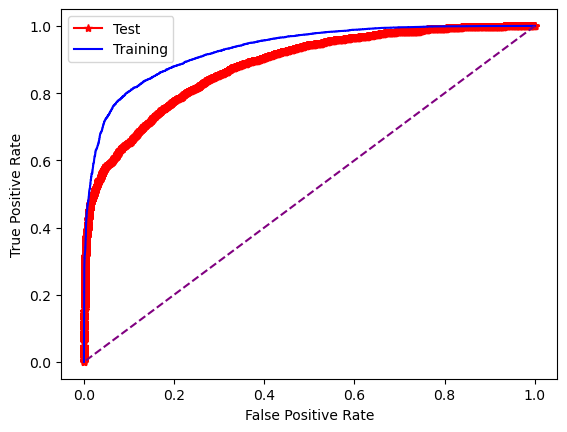

In [58]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=logistic_regression_model_2):
    return model.predict_proba(X)[:, 1]

def generate_roc_curve(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label=True)
    return fpr, tpr

# Generate ROC curve for test data
fpr_test, tpr_test = generate_roc_curve(y_test, generate_probs(X_test))

# Generate ROC curve for train data
fpr_train, tpr_train = generate_roc_curve(y_train, generate_probs(X_train))

# Plot ROC curves
plt.plot(fpr_test, tpr_test, '-*r')
plt.plot(fpr_train, tpr_train, '-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test', 'Training'])
plt.plot([1, 0], [1, 0], color='purple', linestyle="--")
plt.show()

In [59]:
# Calculate and print ROC AUC score
roc_auc_score_lgr = roc_auc_score(y_test, generate_probs(X_test))
print(f'Roc_Accuracy_Score: {roc_auc_score_lgr:.2%}')

Roc_Accuracy_Score: 88.03%


#### Model 2 iter 1

In [60]:
# Define the decision tree pipeline
dt_pipeline_v2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])

# Define parameters for grid search
param_grid_v2 = [
    {'dt__max_depth': [1, 5, 10, 15],
     'dt__min_samples_split': [1.0, 3, 5],
     'dt__min_samples_leaf': [1, 2, 5]
    }
]

# Create GridSearchCV object
decision_tree_results_v2 = GridSearchCV(estimator=dt_pipeline_v2, 
                                        param_grid=param_grid_v2, 
                                        cv=20, 
                                        scoring='accuracy', 
                                        refit=True)

# Fit the model
decision_tree_results_v2.fit(X_train, y_train)

# Best estimator and best parameters
best_estimator_dt_v2 = decision_tree_results_v2.best_estimator_
best_params_dt_v2 = decision_tree_results_v2.best_params_

print("Best Estimator:", best_estimator_dt_v2)
print("Best Parameters:", best_params_dt_v2)

Best Estimator: Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=15, min_samples_split=3))])
Best Parameters: {'dt__max_depth': 15, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 3}


In [61]:
# Predicting on the test and train data using the best estimator from the decision tree results
predicted_y_test_dt = decision_tree_results_v2.best_estimator_.predict(X_test)
predicted_y_train_dt = decision_tree_results_v2.best_estimator_.predict(X_train)

# Printing the predictions
print(predicted_y_test_dt)
print(predicted_y_train_dt)

[False False False ... False False False]
[False False  True ... False False False]


In [62]:
test_score_dt_v2 = decision_tree_results_v2.score(X_test, y_test)
print(f'Test Score: {test_score_dt_v2:.2%}')

Test Score: 92.33%


In [63]:
train_score_dt_v1 = decision_tree_results_v2.score(X_train, y_train)
print(f'Train Score: {train_score_dt_v1:.2%}')

Train Score: 92.49%


In [64]:
conf_matrix_dt_v1 = confusion_matrix(y_test, predicted_y_test_dt)
print(conf_matrix_dt_v1)

[[17422   180]
 [ 1353  1045]]


In [65]:
report_dt_v1 = classification_report(y_test, predicted_y_test_dt)
print(report_dt_v1)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96     17602
        True       0.85      0.44      0.58      2398

    accuracy                           0.92     20000
   macro avg       0.89      0.71      0.77     20000
weighted avg       0.92      0.92      0.91     20000



In [66]:
# Calculate and print accuracy score
accuracy_dt_v1 = accuracy_score(y_test, predicted_y_test_dt)
print(f'Accuracy Score: {accuracy_dt_v1:.2%}')

# Calculate and print precision score
precision_dt_v1 = precision_score(y_test, predicted_y_test_dt, average="macro")
print(f'Precision Score: {precision_dt_v1:.2%}')

# Calculate and print recall score
recall_dt_v1 = recall_score(y_test, predicted_y_test_dt, average="macro")
print(f'Recall Score: {recall_dt_v1:.2%}')

Accuracy Score: 92.33%
Precision Score: 89.05%
Recall Score: 71.28%


In [67]:
f1_score_dt_v1 = f1_score(y_test, predicted_y_test_dt)
print(f'F1 Score: {f1_score_dt_v1:.2%}')

F1 Score: 57.69%


#### Model 2 iter 2

In [68]:
# Define the decision tree pipeline for the second iteration
dtr_pipeline_v2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])

# Define parameters for grid search for the second iteration
param_grid_v2 = [
    {'dt__max_depth': [14, 15, 16],
     'dt__min_samples_split': [4, 5, 6],
     'dt__min_samples_leaf': [1, 2, 3]
    }
]

# Create GridSearchCV object for the second iteration
decision_tree_results_v2 = GridSearchCV(estimator=dtr_pipeline_v2, 
                                        param_grid=param_grid_v2, 
                                        scoring='accuracy', 
                                        refit=True)

# Fit the model for the second iteration
decision_tree_results_v2.fit(X_train, y_train)

# Best estimator and best parameters for the second iteration
best_estimator_dt_v2 = decision_tree_results_v2.best_estimator_
best_params_dt_v2 = decision_tree_results_v2.best_params_

print("Best Estimator:", best_estimator_dt_v2)
print("Best Parameters:", best_params_dt_v2)

Best Estimator: Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=15, min_samples_split=6))])
Best Parameters: {'dt__max_depth': 15, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 6}


In [69]:
Predict_y_test_dtr = decision_tree_results_v2.best_estimator_.predict(X_test)
Predict_y_train_dtr = decision_tree_results_v2.best_estimator_.predict(X_train)
print(Predict_y_test_dtr)
print(Predict_y_train_dtr)

[False False False ... False False False]
[False False  True ... False False False]


In [70]:
print(f'Test Score: {decision_tree_results_v2.score(X_test, y_test): .2%}')

Test Score:  92.37%


In [71]:
print(f'Train Score: {decision_tree_results_v2.score(X_train, y_train): .2%}')

Train Score:  92.46%


In [72]:
confusion_matrix(y_test,Predict_y_test_dtr)

array([[17424,   178],
       [ 1348,  1050]])

In [73]:
print(classification_report(y_test, decision_tree_results_v2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96     17602
        True       0.86      0.44      0.58      2398

    accuracy                           0.92     20000
   macro avg       0.89      0.71      0.77     20000
weighted avg       0.92      0.92      0.91     20000



In [74]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_dtr):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')

Accuracy Score:92.37%
Precision Score:89.16%
Recall Score:71.39%


In [75]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_dtr):.2%}')

F1 Score:57.92%


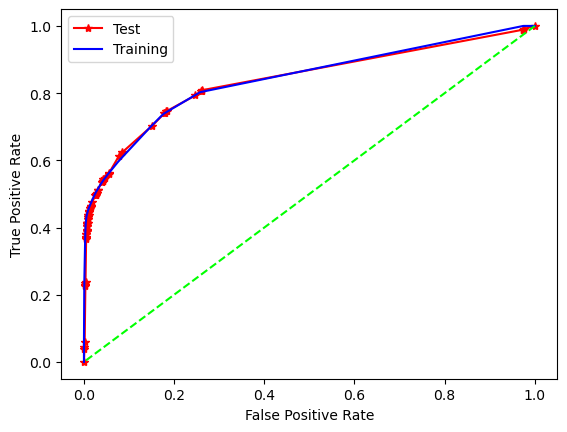

In [76]:
# ROC curve
def generate_probs(X, model=decision_tree_results_v2.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='lime', linestyle="--")
plt.show()

In [77]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')

Roc_Accuracy_Score:83.77%


#### Model 3

In [78]:
knn_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)
knn_results.best_estimator_

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('model',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

In [79]:
print(f'Test Score: {knn_results.score(X_test, y_test): .2%}')

Test Score:  91.55%


In [80]:
print(f'Train Score: {knn_results.score(X_train, y_train): .2%}')

Train Score:  100.00%


In [81]:
Predict_y_test_knn = knn_results.best_estimator_.predict(X_test)
Predict_y_train_knn = knn_results.best_estimator_.predict(X_train)
print(Predict_y_test_knn)
print(Predict_y_train_knn)

[False False False ... False False False]
[False False False ... False False False]


In [82]:
confusion_matrix(y_test,Predict_y_test_knn)

array([[17346,   256],
       [ 1435,   963]])

In [83]:
print(classification_report(y_test, knn_results.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     17602
        True       0.79      0.40      0.53      2398

    accuracy                           0.92     20000
   macro avg       0.86      0.69      0.74     20000
weighted avg       0.91      0.92      0.90     20000



In [84]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_knn):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_knn,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_knn,average="macro"):.2%}')

Accuracy Score:91.55%
Precision Score:85.68%
Recall Score:69.35%


In [85]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_knn):.2%}')

F1 Score:53.25%


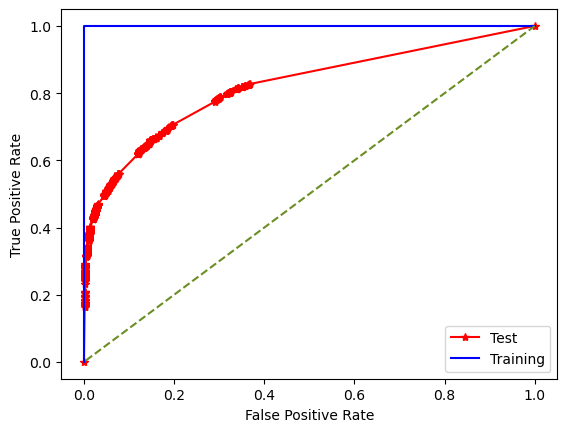

In [86]:
def generate_probs(X, model= knn_results.best_estimator_):
    return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='olivedrab', linestyle="--")
plt.show()

In [87]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')

Roc_Accuracy_Score:82.10%
